# Milestones 2

---

# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Folder vehicle ini berisi tentang jenis-jenis kendaraan :
- Mobil
- Motor
- Bus
- Perahu
- Sepeda
- Helikopter
- Pesawat
- Skuter
- Truk
- Kereta

Jenis-jenis kendaraan ini akan jadikan beberapa kelas yang mana model akan dibuat dan dilatih untuk bisa membedakan jenis kendaraan berdasarkan bentuknya dengan menggunakan gambar kendaraan sebagai input. Setelah model sudah selesai, user akan melakukan uji model yang mana user akan memasukan sebuah gambar kendaraan secara acak. Jika model tersebut bisa memprediksi jenis kendaraan pada gambar yang telah diinput oleh user dan hasilnya tepat, maka model tersebut sudah dikatakan berhasil memprediksi jenis kendaraan dengan baik. 

Contoh : User memberikan inputan (upload) gambar mobil, model akan mengeluarkan output berupa sebuah teks (string) yaitu mobil.

Link Dataset : https://www.kaggle.com/datasets/rishabkoul1/vechicle-dataset

Objective : 
- Mampu membuat model Deep Learning untuk mengklasifikasi jenis kendaraan berdasarkan bentuk kendaraan (ukuran, jumlah roda, dll) dengan menggunakan gambar sebagai input.

# 2. Import Pustaka
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

## 2.1. Setup Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# # navigasi ke folder
# % cd /content/gdrive/My Drive/Dataset_pembelajaran

## 2.2. Library

In [17]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd


# Tensor flow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Modelling
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Inference
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize
from tensorflow import expand_dims
from sklearn.metrics import classification_report

In [4]:
# from google.colab import files
 
# uploaded = files.upload()

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# for dirpath, dirnames, filenames in os.walk('vechicle_classification/vechicle_with_train/vechicles'):
#   print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

for dirpath, dirnames, filenames in os.walk('vehicles'):
  print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

Ada 3 folder dan 0 gambar di direktori vehicles
Ada 4 folder dan 0 gambar di direktori vehicles\test
Ada 0 folder dan 10 gambar di direktori vehicles\test\bike
Ada 0 folder dan 10 gambar di direktori vehicles\test\bus
Ada 0 folder dan 7 gambar di direktori vehicles\test\car
Ada 0 folder dan 10 gambar di direktori vehicles\test\truck
Ada 4 folder dan 0 gambar di direktori vehicles\train
Ada 0 folder dan 98 gambar di direktori vehicles\train\bike
Ada 0 folder dan 41 gambar di direktori vehicles\train\bus
Ada 0 folder dan 51 gambar di direktori vehicles\train\car
Ada 0 folder dan 43 gambar di direktori vehicles\train\truck
Ada 4 folder dan 0 gambar di direktori vehicles\valid
Ada 0 folder dan 10 gambar di direktori vehicles\valid\bike
Ada 0 folder dan 7 gambar di direktori vehicles\valid\bus
Ada 0 folder dan 9 gambar di direktori vehicles\valid\car
Ada 0 folder dan 5 gambar di direktori vehicles\valid\truck


# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [3]:
# EDA
data_dir = pathlib.Path("vehicles/train")
vechicle = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(vechicle)

['bike' 'bus' 'car' 'truck']


Terdapat 10 jenis kendaraan di dalam folder vechicle ini.

## 4.1. Bike (Motor)

In [4]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  fig = plt.figure(figsize=(15,8))

  # Gambar 1
  ax = fig.add_subplot(1,3,1)
  # ambil gambar secara acak
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"ukuran Gambar 1: {img.shape}")

  # Gambar 2
  ax = fig.add_subplot(1,3,2)
  # ambil gambar secara acak
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"ukuran Gambar 2: {img.shape}")

  # Gambar 3
  ax = fig.add_subplot(1,3,3)
  # ambil gambar secara acak
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"ukuran Gambar 3: {img.shape}")
  return img

ukuran Gambar 1: (176, 287, 3)
ukuran Gambar 2: (100, 100, 3)
ukuran Gambar 3: (100, 100, 3)


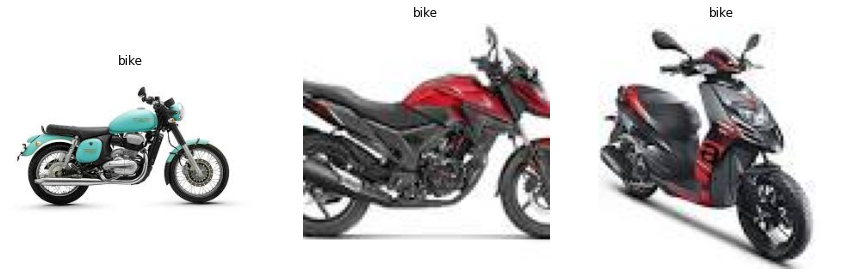

In [5]:
# tampilkan gambar sepeda
bike_img = view_random_image(target_dir='vehicles/train/', target_class='bike')

Ciri-ciri sepeda motor :
- Digerakkan dengan mesin.
- Mempunyai dua roda yang sebaris lurus.
- Mempunyai setang untuk mengendalikan arah jalannya motor.
- Termasuk kendaraan darat

## 4.2. Car (Mobil)

ukuran Gambar 1: (100, 100, 3)
ukuran Gambar 2: (100, 100, 3)
ukuran Gambar 3: (185, 272, 3)


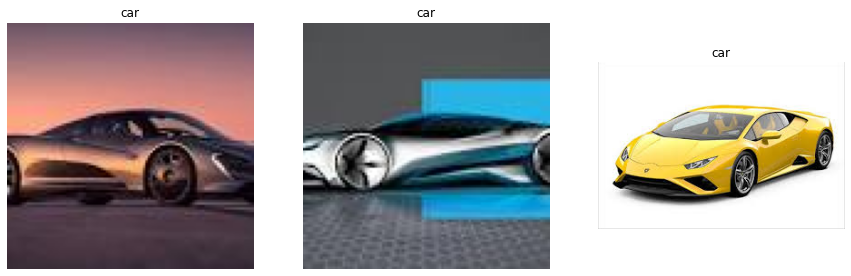

In [6]:
# tampilkan gambar mobil
car_img = view_random_image(target_dir='vehicles/train/', target_class='car')

Ciri-ciri mobil : 
- Kendaraan yang digerakkan dengan mesin.
- Mempunyai dua roda depan dan dua roda belakang.
- Mobil mempunyai ruang dalam yang berisikan kursi.
- Mempunyai setir untuk mengendalikan arah jalannya mobil.
- Mempunyai pintu.
- Termasuk kendaraan darat.

## 4.3. Bus

ukuran Gambar 1: (194, 259, 3)
ukuran Gambar 2: (100, 100, 3)
ukuran Gambar 3: (100, 100, 3)


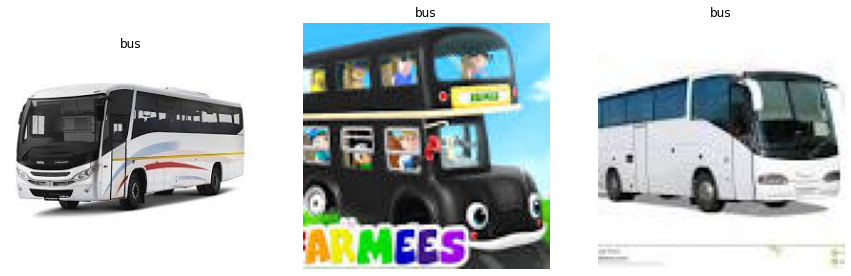

In [8]:
# Bus
bus_img = view_random_image(target_dir='vehicles/train/', target_class='bus')

Ciri-ciri bus :
- Ukuran bus umumnya lebih besar daripada mobil.
- Memiliki dua roda depan dan dua roda belakang.
- Bisa mengangkut banyak penumpang.
- Mempunyai setir untuk mengendalikan arah jalan bus.
- Mempunyai pintu.
- Termasuk kendaran darat.

## 4.4. Truck

ukuran Gambar 1: (100, 100, 3)
ukuran Gambar 2: (100, 100, 4)
ukuran Gambar 3: (100, 100, 3)


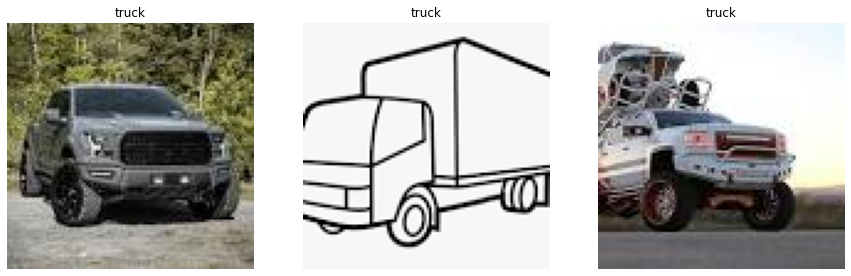

In [9]:
# Truk
truck_img = view_random_image(target_dir='vehicles/train/', target_class='truck')

Ciri-ciri Truk :
- Umumnya memiliki ukuran yang besar dibanding mobil.
- Mempunyai ruang pengankut barang di bagian belakang truk.
- Ruang depan berisikan kursi supir dan penumpang.
- Mempunyai pintu masuk ke dalam ruang depan.
- Termasuk kendaraan darat.

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



In [10]:
# preprocessing data image
# Train & Test

tf.random.set_seed(20)

# deklarasikan object
train_datagen = ImageDataGenerator(rescale=1./255)
# augmentasi
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# set direktori
train_dir = 'vehicles/train/'
test_dir = 'vehicles/test/'
val_dir = 'vehicles/valid/'

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)

test_data = test_datagen.flow_from_directory(test_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)                                              

# Augmented
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)

Found 233 images belonging to 4 classes.
Found 31 images belonging to 4 classes.
Found 37 images belonging to 4 classes.
Found 233 images belonging to 4 classes.


# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6.1. Base Model

In [12]:
# Make Model

# Base model
model1 = Sequential()
model1.add(Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPool2D(2))
model1.add(Conv2D(32, 3, activation='relu'))
model1.add(MaxPool2D(2))
model1.add(Flatten())
model1.add(Dense(15, activation='relu'))
model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_2 (Dense)             (None, 15)               

In [13]:
model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

## 6.2. Transfer Learning dengan menggunakan Arsitektur VGG 16

Saya akan menggunakan Arsitektur VGG16 untuk mengklasifikasi jenis kendaraan.

In [33]:
conv_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [34]:
for layer in conv_vgg.layers:
  layer.trainable = False

In [35]:
x = Flatten()(conv_vgg.output)
x = Dense(16, activation='relu')(x)
output_layer = Dense(4, activation='softmax')(x)

model3 = Model(inputs=conv_vgg.input, outputs=output_layer)

model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [36]:
model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7.1. Base Model Training

In [14]:
# Training Model

history1 = model1.fit(train_data_augmented, epochs=20, validation_data=valid_data, verbose=1)

Epoch 1/20
15/15 [==============================] - 11s 686ms/step - loss: 2.5515 - accuracy: 0.2275 - val_loss: 1.3863 - val_accuracy: 0.3226
Epoch 2/20
15/15 [==============================] - 10s 634ms/step - loss: 1.3851 - accuracy: 0.4206 - val_loss: 1.3851 - val_accuracy: 0.3226
Epoch 3/20
15/15 [==============================] - 10s 636ms/step - loss: 1.3826 - accuracy: 0.4206 - val_loss: 1.3836 - val_accuracy: 0.3226
Epoch 4/20
15/15 [==============================] - 10s 636ms/step - loss: 1.3793 - accuracy: 0.4206 - val_loss: 1.3824 - val_accuracy: 0.3226
Epoch 5/20
15/15 [==============================] - 8s 506ms/step - loss: 1.3766 - accuracy: 0.4206 - val_loss: 1.3810 - val_accuracy: 0.3226
Epoch 6/20
15/15 [==============================] - 6s 419ms/step - loss: 1.3736 - accuracy: 0.4206 - val_loss: 1.3798 - val_accuracy: 0.3226
Epoch 7/20
15/15 [==============================] - 6s 415ms/step - loss: 1.3709 - accuracy: 0.4206 - val_loss: 1.3784 - val_accuracy: 0.3226
Ep

## 7.2. Model Training dengan Arsitektur VGG16

In [37]:
history3 = model3.fit(train_data_augmented, epochs=20, validation_data=valid_data, verbose=1)

Epoch 1/20
15/15 [==============================] - 44s 3s/step - loss: 1.5232 - accuracy: 0.3433 - val_loss: 1.0900 - val_accuracy: 0.3548
Epoch 2/20
15/15 [==============================] - 41s 3s/step - loss: 0.9044 - accuracy: 0.5322 - val_loss: 0.9479 - val_accuracy: 0.4194
Epoch 3/20
15/15 [==============================] - 41s 3s/step - loss: 0.7794 - accuracy: 0.5880 - val_loss: 0.9491 - val_accuracy: 0.4516
Epoch 4/20
15/15 [==============================] - 41s 3s/step - loss: 0.7050 - accuracy: 0.6395 - val_loss: 0.8306 - val_accuracy: 0.6452
Epoch 5/20
15/15 [==============================] - 51s 3s/step - loss: 0.7032 - accuracy: 0.7854 - val_loss: 0.7870 - val_accuracy: 0.7097
Epoch 6/20
15/15 [==============================] - 53s 4s/step - loss: 0.6791 - accuracy: 0.8026 - val_loss: 0.7559 - val_accuracy: 0.7419
Epoch 7/20
15/15 [==============================] - 53s 4s/step - loss: 0.6496 - accuracy: 0.8197 - val_loss: 0.7261 - val_accuracy: 0.7419
Epoch 8/20
15/15 [==

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



## 8.1. Base Model

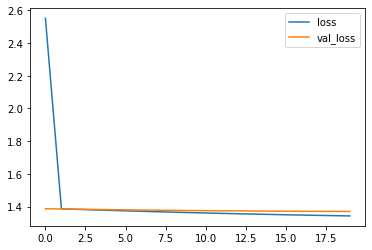

In [15]:
# Evalute Model
metrics = pd.DataFrame(history1.history)
metrics[['loss', 'val_loss']].plot();

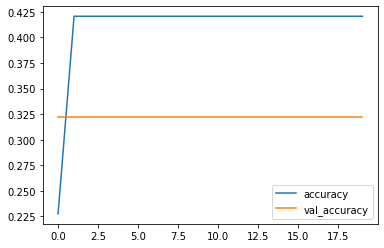

In [16]:
metrics[['accuracy', 'val_accuracy']].plot();

Model 1 (Base model) memiliki overfitting dan juga exploding gradien. Agar tidak terjadi overfitting, dilakukan optimisasi model.

In [60]:
# res1 = model1.predict(test_data)

In [59]:
# y_test = test_data.classes
# res1 = res1.argmax(axis=1)
# print(classification_report(y_test, res1))

## 8.2. VGG16 Model

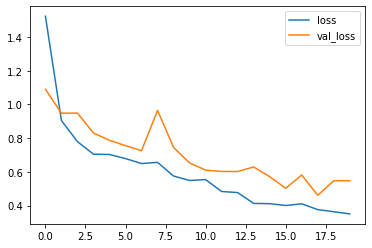

In [40]:
metrics3 = pd.DataFrame(history3.history)
metrics3[['loss', 'val_loss']].plot();

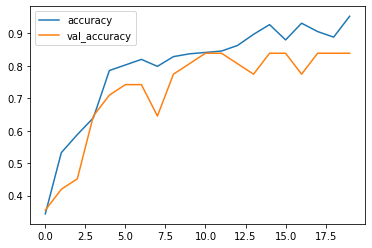

In [41]:
metrics3[['accuracy', 'val_accuracy']].plot();

In [57]:
# res2 = model3.predict(test_data)

In [58]:
# y_test_2 = test_data.classes
# res2 = res2.argmax(axis=1)
# print(classification_report(y_test_2, res2))

Model dengan menggunakan VGG16 menghasilkan akurasi yang cukup bagus dibanding dengan model 1 (base model)

In [65]:
# Simpan model tensorflow
model3.save('model_image_vehicle_vgg16.h5')
print('Model saved!')

Model saved!


# 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [31]:
# Inference 

# from google.colab import files
# files.upload()

## 9.1. Upload Image

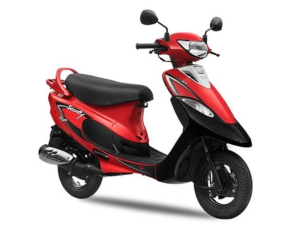

In [61]:
# Tampilkan gambar yang telah di upload

new_img = mpimg.imread('image_inference/new-tvs-scooty-pep-2.jpg')
plt.imshow(new_img);
plt.axis(False);

In [45]:
def load_and_preprocess(filename, img_shape=224):
  img = read_file(filename)
  img = decode_image(img, channels=3)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

## 9.2. Prediksi

In [62]:
new_img = load_and_preprocess('image_inference/new-tvs-scooty-pep-2.jpg')
new_img = expand_dims(new_img, axis=0)
res = model3.predict(new_img)
res

array([[9.9990273e-01, 6.4281739e-05, 2.8540522e-05, 4.4495860e-06]],
      dtype=float32)

In [63]:
# top=sorted(range(len(res[0])), key=lambda i: res[0][i])[-1:]
# print(top)

# ambil 3 nilai index res dengan nilai probability tertinggi
top3=sorted(range(len(res[0])), key=lambda i: res[0][i])[-3:]
print(top3)

[2, 1, 0]


In [64]:
# print(str(vechicle[top]))

for i in top3:
    print(i)
    print(str(vechicle[i])+": %"+str(res[0][i]*100)+"\n")

2
car: %0.0028540522180264816

1
bus: %0.006428173946915194

0
bike: %99.99027252197266



Data Inference yang digunakan adalah gambar kendaraan berjenis mobil. Setelah diprediksi dengan menggunakan model VGG16, hasil yang didapat adalah 90% gambar tersebut menjelaskan bahwa gambar tersebut termasuk jenis kendaraan mobil (Car). Hasilnya sesuai ekspetasi karena model ini bisa memprediksi klasifikasi jenis kendaraan dengan tepat.

# 10. Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Berdasarkan EDA : 
  - Terdapat 10 jenis kendaraan yang ada di dalam folder vechicle ini :
    - Kendaraan darat : mobil, motor, kereta, sepeda, scooter, truk, dan bus
    - Kendaraan laut : kapal
    - Kendaraan udara : helikopter, pesawat
  - Kendaraan yang mempunyai dua roda sebaris adalah motor, sepeda, dan scooter.
  - Bus, mobil, truk adalah jenis kendaraan yang mirip tetapi hanya berbeda pada ukuran, bobot, dan penumpang yang dapat dimuat. Bus adalah jenis transportasi yang bisa menompang banyak penumpang selama perjalanan darat.
  - Sepeda, scooter, dan motor adalah jenis kendaraan yang mirip tetapi hanya berbeda pada ukuran, bobot, dan hanya sepeda saja yang tidak memiliki mesin (membutuhkan tenaga manusia secara keseluruhan).
  - Kereta hanya bisa bergerak di atas rel. Rel tersebut akan mengarahkan kereta ke tujuan tertentu.
  - Saat ini, pesawat adalah salah satu jenis kendaraan yang populer karena selain bisa menompang banyak penumpang, tetapi bisa pergi ke daerah yang jauh dengan waktu yang singkat.
2. Berdasarkan Evaluasi Model :
  - Setelah model dibuat dan dilatih (train) dengan beberapa metode algoritma yang berbeda, didapatkan **Model dengan menggunakan Arsitektur VGG16** adalah model deep learning terbaik untuk mengklasifikasi jenis kendaraan karena nilai loss yang didapatkan lebih rendah daripada base model dan akurasi yang didapatkan lebih tinggi daripada base model. Sehingga ketika model mengklasifikasi jenis kendaraan dengan gambar kendaraan sebagai input dapat diprediksi dengan baik.